In [1]:
import pandas as pd
from matplotlib.image import imread
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r'C:\Users\Karl\Desktop\kaggle\tgs-salt-identification-challenge')
train_image_path = r'data\raw\train\images'
test_image_path = r'data\raw/test\images'
mask_path = r'data\raw\train\masks'

In [3]:
train_image_list = [f for f in os.listdir(train_image_path)
                                   if f.endswith('.png')]
test_image_list = [f for f in os.listdir(test_image_path)
                                   if f.endswith('.png')]

print('number of train image:',len(train_image_list))
print('number of test image:',len(test_image_list))

number of train image: 4000
number of test image: 18000


In [4]:
train = pd.read_csv(r'data/raw/train.csv',index_col=None)

In [5]:
train.shape

(4000, 2)

In [6]:
train.id.unique().shape

(4000,)

In [7]:
depths = pd.read_csv(r'data/raw/depths.csv',index_col=None)

In [8]:
depths.shape

(22000, 2)

In [9]:
depths.id.unique().shape

(22000,)

In [10]:
train_depths = depths[depths.id.isin(train.id.unique())]
test_depths = depths[~depths.id.isin(train.id.unique())]


In [11]:
print(train_depths.shape)
print(test_depths.shape)

(4000, 2)
(18000, 2)


In [12]:
train_depths.head()

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


In [13]:
test_depths.head()

,id,z
4000,353e010b7b,264
4001,5439dbbddf,557
4002,71bab9f311,846
4003,52551f7a80,610
4004,512d8d9997,577


In [14]:
train.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [15]:
train_image_list[0]

'000e218f21.png'

In [16]:
os.getcwd()

'C:\\Users\\Karl\\Desktop\\kaggle\\tgs-salt-identification-challenge'

In [17]:
x = []
y = []
ind = []
depth = []
for img_id in train.id:
    read_img = imread(os.path.join(train_image_path,img_id+'.png'))
    mask_img = imread(os.path.join(mask_path,img_id+'.png'))
    read_img = read_img.reshape(-1,3)
    mask_img = mask_img.reshape(-1)
    x.extend(np.append(read_img,read_img/train_depths['z'][train_depths.id==img_id].values[0],axis=1))
    y.extend(mask_img)
    ind.extend([img_id] * read_img.shape[0])
    depth.extend([train_depths['z'][train_depths.id==img_id].values[0]] * read_img.shape[0])

In [18]:
x = np.array(x)
y = np.array(y)
ind = np.array(ind)
depth = np.array(depth)

In [95]:
x[0]

array([0.5254902 , 0.5254902 , 0.5254902 , 0.00062336, 0.00062336,
       0.00062336], dtype=float32)

In [102]:
x_input = np.moveaxis(x.reshape(-1,1,101*101,6),2,3)

In [115]:
x_input.shape

(4000, 1, 6, 10201)

In [131]:
x_mean=np.mean(x_input, axis=-1)
x_mean = x_mean.reshape(-1,1,6,1)
x_sd=np.std(x_input, axis=-1)
x_sd = x_sd.reshape(-1,1,6,1)

In [132]:
x_mean.shape

(4000, 1, 6, 1)

In [138]:
x_normalized = ((x_input-x_mean)/x_sd)

c:\users\karl\anaconda3\envs\salt\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [148]:
y[(x_sd==0).any(axis=2).reshape(-1)]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 40804000 but corresponding boolean dimension is 4000

In [157]:
y[np.array(list(range(4000)))[(x_sd==0).any(axis=2).reshape(-1)]*101*101]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [160]:
sd0_ind = np.array(list(range(4000)))[(x_sd==0).any(axis=2).reshape(-1)]

In [168]:
for img_id in np.array(train.id)[sd0_ind]:
    print(img_id,':' ,imread(os.path.join(mask_path,img_id+'.png'))[0][0])

1f0b16aa13 : 0.0
5edb37f5a8 : 0.0
a536f382ec : 0.0
97515a958d : 0.0
99909324ed : 0.0
a9e940dccd : 0.0
8c1d0929a2 : 0.0
96049af037 : 0.0
1efe1909ed : 0.0
5aa0015d15 : 0.0
a3e0a0c779 : 0.0
c20069b110 : 0.0
d6437d0c25 : 0.0
e7da2d7800 : 0.0
2fb6791298 : 0.0
b552fb0d9d : 0.0
5ff89814f5 : 0.0
d1665744c3 : 0.0
a31e485287 : 0.0
e0da89ce88 : 0.0
dcca025cc6 : 0.0
37df75f3a2 : 0.0
6b95bc6c5f : 0.0
a8be31a3c1 : 0.0
f26e6cffd6 : 0.0
1f73caa937 : 0.0
e82421363e : 0.0
1c0b2ceb2f : 0.0
bedb558d15 : 0.0
d0e720b57b : 0.0
d93d713c55 : 0.0
b9bf0422a6 : 0.0
c3589905df : 0.0
e51599adb5 : 0.0
0d8ed16206 : 0.0
40ccdfe09d : 0.0
20ed65cbf8 : 0.0
a56e87840f : 0.0
1b0d74b359 : 0.0
b637a7621a : 0.0
96d1d6138a : 0.0
58789490d6 : 0.0
7769e240f0 : 0.0
d8bed49320 : 0.0
9260b4f758 : 0.0
d2e14828d5 : 0.0
808cbefd71 : 0.0
ff9d2e9ba7 : 0.0
6f79e6d54b : 0.0
a2b7af2907 : 0.0
287b0f197f : 0.0
51870e8500 : 0.0
8ee20f502e : 0.0
a48b9989ac : 0.0
b11110b854 : 0.0
cc15d94784 : 0.0
d0244d6c38 : 0.0
590f7ae6e7 : 0.0
573f9f58c4 : 0

In [177]:
x_normalized = np.moveaxis(x_normalized,2,3)
x_normalized = np.nan_to_num(x_normalized)

In [180]:
x1 = x_normalized.reshape(-1,6)[y==1]
x0 = x_normalized.reshape(-1,6)[y==0]

In [181]:
x.shape

(40804000, 6)

In [182]:
print(np.max(x1,axis=0))
print(np.min(x1,axis=0))
print(np.mean(x1,axis=0))

[23.363926 23.363926 23.363926 23.363398 23.363398 23.363398]
[-23.193754 -23.193754 -23.193754 -23.192825 -23.192825 -23.192825]
[0.01994443 0.01994443 0.01994443 0.01995553 0.01995553 0.01995553]


In [183]:
print(np.max(x0,axis=0))
print(np.min(x0,axis=0))
print(np.mean(x0,axis=0))

[26.117125 26.117125 26.117125 26.117224 26.117224 26.117224]
[-81.33885  -81.33885  -81.33885  -81.336525 -81.336525 -81.336525]
[-0.00658666 -0.00658666 -0.00658666 -0.00658292 -0.00658292 -0.00658292]


In [184]:
n0=x0.shape[0]
t0=np.random.choice(range(n0), size=int(n0*0.1), replace=False)

n1=x1.shape[0]
t1=np.random.choice(range(n1), size=int(n1*0.1), replace=False)



c:\users\karl\anaconda3\envs\salt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


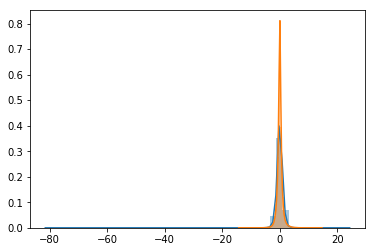

In [186]:
sns.distplot(x0[t0,0])
sns.distplot(x1[t1,0])


c:\users\karl\anaconda3\envs\salt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


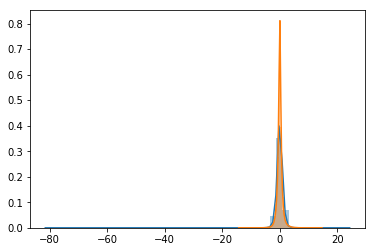

In [187]:
sns.distplot(x0[t0,1])
sns.distplot(x1[t1,1])

c:\users\karl\anaconda3\envs\salt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


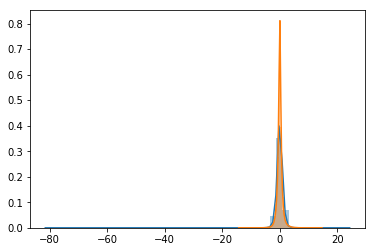

In [188]:
sns.distplot(x0[t0,2])
sns.distplot(x1[t1,2])

c:\users\karl\anaconda3\envs\salt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


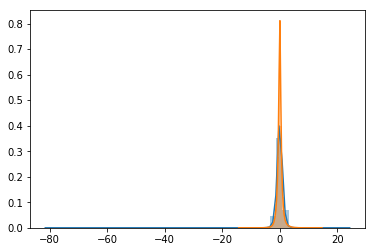

In [189]:
sns.distplot(x0[t0,3])
sns.distplot(x1[t1,3])

c:\users\karl\anaconda3\envs\salt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


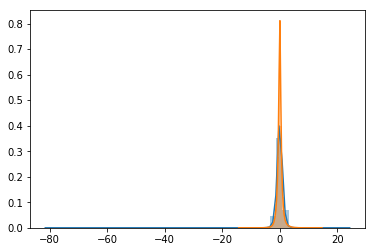

In [190]:
sns.distplot(x0[t0,4])
sns.distplot(x1[t1,4])

c:\users\karl\anaconda3\envs\salt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


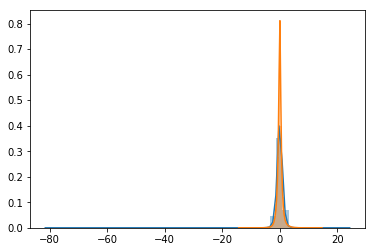

In [191]:
sns.distplot(x0[t0,5])
sns.distplot(x1[t1,5])

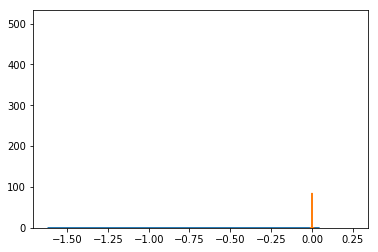

In [216]:

sns.distplot(np.sum(x0[t0,3:6]**3,axis=1)*1e-6,bins=list([(i-250)/1000 for i in range(500)]))
sns.distplot(np.sum(x1[t1,3:6]**3,axis=1)*1e-6,bins=list([(i-250)/1000 for i in range(500)]))


c:\users\karl\anaconda3\envs\salt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


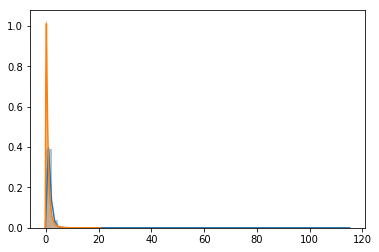

In [194]:
sns.distplot(np.sum(x0[t0,4:6]**2,axis=1)**(0.5))
sns.distplot(np.sum(x1[t1,4:6]**2,axis=1)**(0.5))


In [ ]:
sns.distplot(np.sum(x0[t0,4:6]**2,axis=1)**(0.5))
sns.distplot(np.sum(x1[t1,4:6]**2,axis=1)**(0.5))

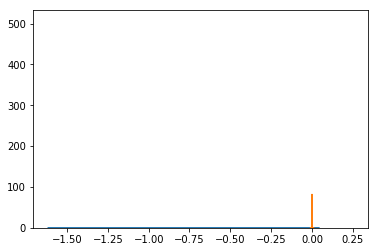

In [218]:
sns.distplot(np.sum(x0[t0,:3]**3,axis=1)*1e-6,bins=list([(i-250)/1000 for i in range(500)]))
sns.distplot(np.sum(x1[t1,:3]**3,axis=1)*1e-6,bins=list([(i-250)/1000 for i in range(500)]))

c:\users\karl\anaconda3\envs\salt\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


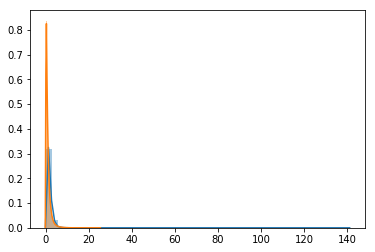

In [209]:
sns.distplot(np.sum(x0[t0,3:6]**2,axis=1)**(1/2))
sns.distplot(np.sum(x1[t1,3:6]**2,axis=1)**(1/2))


In [208]:
range(3,6,2)

range(3, 6, 2)